# Optical Pumping - Rabi Analysis

For our experimental physics class project, we conducted an experiment to study optical pumping and
understand the basic quantum mechanics involved in single electron atomic transitions. We used a
Rubidium sample and light source to study the intensity of light absorbed by the sample while it’s
being optically pumped and then depumped. Several depumping methods were investigated such
as applying a net zero-field on the sample and applying an RF signal. We were able to use curvefitting
algorithms to measure the Lande-g factors of Rubidium isotopes using a couple of methods
and compare them to their expected theoretical values.

This script does two things:
1. It analyzes the raw data for the amplitude and period of the two rubidium isotope curves and fits the data to the appropriate function. 

2. It plots the relation between amplotide and period for each isotope to show the difference in their decay parameters.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Iterate over Raw Data File to extract amplitude and period values
filename = 'rabiData_5.csv'
with open(filename) as file:
    Lines = file.readlines() # All lines in the file
    
    amplitude = Lines[0].split(",")
    
    time_85 = Lines[1].split(",")
    wave_number_85 = Lines[2].split(",")
    period_85 = Lines[3].split(",")
    
    time_87 = Lines[4].split(",")
    wave_number_87 = Lines[5].split(",")
    period_87 = Lines[6].split(",")


time_error = 0.04

# Initialize empty lists for each curve
error_85 = []
error_87 = []    

# Convert data to float
for l in range(len(amplitude)):
    
    amplitude[l] = float(amplitude[l])
    
    time_85[l] = float(time_85[l])
    time_87[l] = float(time_87[l])
    
    wave_number_85[l] = float(wave_number_85[l])
    wave_number_87[l] = float(wave_number_87[l])
    
    period_85[l] = float(period_85[l])
    period_87[l] = float(period_87[l])
    
    error_85.append(0.02/wave_number_85[l])
    error_87.append(0.04/wave_number_87[l])
    



<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
# Define function for the fit
def fitFunc(x, K, C):
    y = K / x + C
    return y
    
par_85, cov_85 = curve_fit(fitFunc, amplitude, period_85, p0=[900,-20], sigma=error_85)
par_87, cov_87 = curve_fit(fitFunc, amplitude, period_87, p0=[600,-5], sigma=error_87)

# Fit Parameters and Uncertainties for each curve 
fit_K_85 = par_85[0]
fit_C_85 = par_85[1]

fit_K_87 = par_87[0]
fit_C_87 = par_87[1]

err_K_85 = np.sqrt(np.diag(cov_85))[0]
err_C_85 = np.sqrt(np.diag(cov_85))[1]

err_K_87 = np.sqrt(np.diag(cov_87))[0]
err_C_87 = np.sqrt(np.diag(cov_87))[1]

print(fit_K_85/fit_K_87)

1.5643772315413267


In [3]:
# Calculating the residuals for one of the curve fits
residuals = period_85 - fitFunc(amplitude, fit_K_85, fit_C_85)
fres = sum(residuals**2)

print("Residuals sum of squares:")
print(fres)

Residuals sum of squares:
0.0002427137591148956


In [4]:
# Define x and y values for each curve to be plotted

curvex85 = np.linspace(0.5,1.6,500)
curvey85 = fitFunc(curvex85, fit_K_85, fit_C_85)

curvex87 = np.linspace(0.5,1.6,500)
curvey87 = fitFunc(curvex87, fit_K_87, fit_C_87)

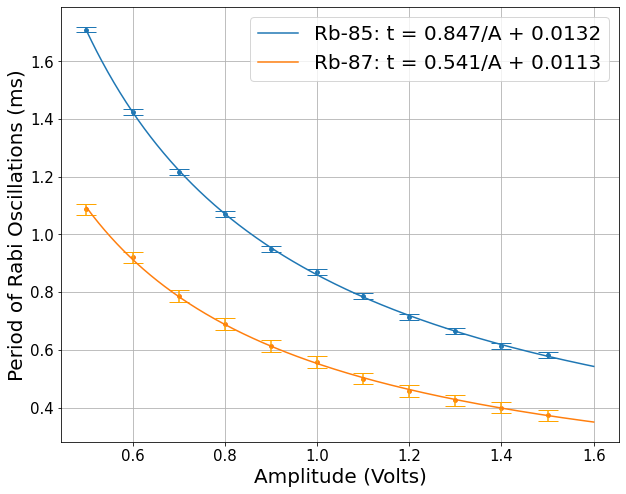

In [5]:
# Plot the data
plt.figure(figsize=(10,8))
plt.scatter(amplitude, period_85, s=15)
plt.scatter(amplitude, period_87, s=15)
plt.errorbar(amplitude, period_85, yerr=error_85, fmt='None', capsize=10)
plt.errorbar(amplitude, period_87, yerr=error_87, fmt='None', c='orange', capsize=10)

plt.plot(curvex85, curvey85, label="Rb-85: " + "t = " + str(np.round(fit_K_85,3)) + "/A + " + str(np.round(fit_C_85,4)))
plt.plot(curvex87, curvey87, label="Rb-87: " + "t = " + str(np.round(fit_K_87,3)) + "/A + " + str(np.round(fit_C_87,4)))

plt.xlabel("Amplitude (Volts)", fontsize=20)
plt.ylabel("Period of Rabi Oscillations (ms)", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True)
plt.legend(fontsize=20)
plt.savefig("Part2Plot.png")
plt.show()